In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('particulars_of_first_registered_vehicle_nov_2019_eng.csv')

groupeddf = df.groupby(['Fuel Type','Vehicle Make']).count().reset_index()

#sns.lmplot(data=groupeddf,x="Vehicle Made", y="Vehicle Model")


#sns.scatterplot(data=groupeddf, x="Vehicle Made", y="Vehicle Model")
groupeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Fuel Type                           94 non-null     object
 1   Vehicle Make                        94 non-null     object
 2   Vehicle Class                       94 non-null     int64 
 3   Vehicle Model                       94 non-null     int64 
 4   Cylinder Capacity Of Engine (c.c.)  94 non-null     int64 
 5   Body Type                           94 non-null     int64 
 6   First Registration Vehicle Status   94 non-null     int64 
 7   Permitted Gross Vehicle Weight      94 non-null     int64 
 8   Number Of Passenger Seats           94 non-null     int64 
 9   Taxable Value (HK$)                 94 non-null     int64 
 10  Year Of Manufacture                 94 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 8.2+ KB


In [464]:
print(groupeddf['Vehicle Make'])

0     ALEXANDER DENNIS
1                  DAF
2             DONGFENG
3                 FORD
4                FOTON
            ...       
89                 TRS
90               VESPA
91          VOLKSWAGEN
92               VOLVO
93              YAMAHA
Name: Vehicle Make, Length: 94, dtype: object


<Axes: xlabel='Vehicle Make', ylabel='Count'>

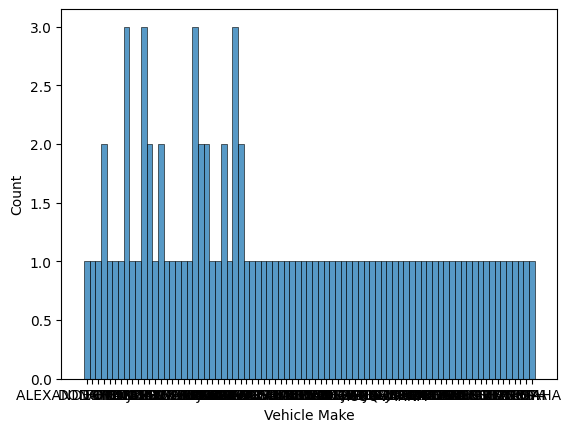

In [465]:
sns.histplot(data=groupeddf, x='Vehicle Make', multiple="dodge")

  Fuel Type  Vehicle Class  Vehicle Make  Vehicle Model  \
0    Diesel            715           715            715   
1  Electric            428           428            428   
2       LPG             93            93             93   
3    Petrol           3316          3316           3316   

   Cylinder Capacity Of Engine (c.c.)  Body Type  \
0                                 715        715   
1                                 428        428   
2                                  93         93   
3                                3316       3316   

   First Registration Vehicle Status  Permitted Gross Vehicle Weight   \
0                                715                              715   
1                                428                              428   
2                                 93                               93   
3                               3316                             3316   

   Number Of Passenger Seats   Taxable Value (HK$)  Year Of Manufacture  
0  

([0, 1, 2, 3],
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Electric'),
  Text(2, 0, 'LPG'),
  Text(3, 0, 'Petrol')])

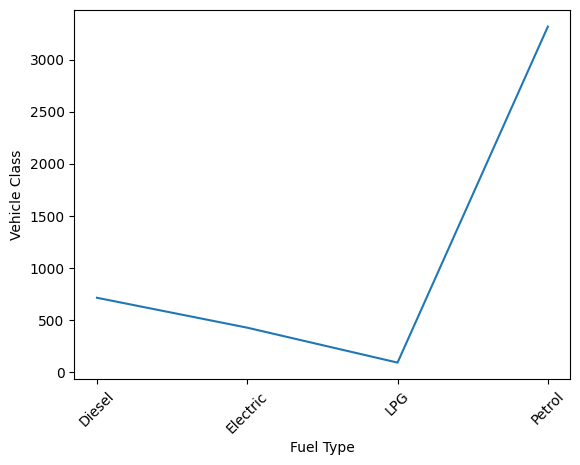

In [466]:
groupeddf2= df.groupby('Fuel Type').count().reset_index()
print(groupeddf2)
sns.lineplot(data=groupeddf2,x='Fuel Type',y='Vehicle Class')
plt.xticks(rotation=45)

<Axes: xlabel='Fuel Type', ylabel='Count'>

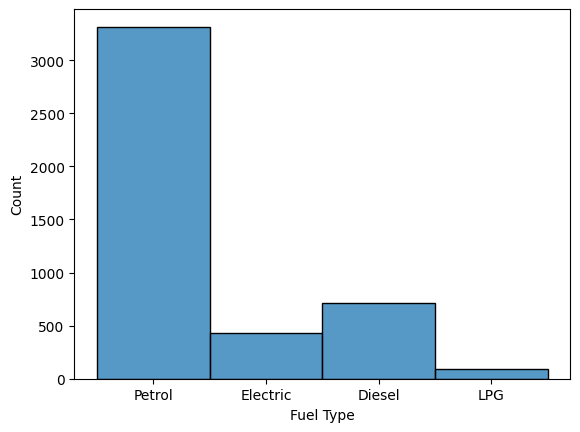

In [467]:
df = pd.read_csv('particulars_of_first_registered_vehicle_nov_2019_eng.csv')
#groupeddf2= df.groupby('Fuel Type')
sns.histplot(data=df, x='Fuel Type')

In [468]:
df = pd.read_csv('particulars_of_first_registered_vehicle_jul_2024_eng.csv')
groupeddf2= df.groupby('Fuel Type').count().reset_index()
#sns.histplot(data=df, x='Fuel Type')
df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
df3['Date']='2024'

df3


,Fuel Type,Count,Date
0,Diesel,288,2024
1,Electric,1743,2024
2,LPG,89,2024
3,Petrol,1522,2024


In [469]:
# create an empty dataframe 
master_df  = pd.DataFrame() 

with open('filelistcsv.txt', 'r') as file:
    line = file.readline()
    while line:

        line = file.readline()
        #print(line, end='')  # Print each line
        if line.strip() == '':
            break
        filename = line.split()[4]
        #print(filename) # get the last part as filename
        monthdate = ''.join(filename.split('_')[5:7])
        #print(monthdate)
        df = pd.read_csv(filename)
        groupeddf2= df.groupby('Fuel Type').count().reset_index()
        #sns.histplot(data=df, x='Fuel Type')
        df3 = groupeddf2[['Fuel Type','Vehicle Make']].copy()
        df3.rename(columns={'Vehicle Make': 'Count'}, inplace=True)
        df3['Date']=monthdate
        master_df=pd.concat([master_df,df3])

master_df.index = pd.to_datetime(master_df['Date'],format = '%b%Y')
master_df.sort_index
print(master_df)





           Fuel Type  Count     Date
Date                                
2021-04-01    Diesel    614  apr2021
2021-04-01  Electric    629  apr2021
2021-04-01       LPG    118  apr2021
2021-04-01    Petrol   3300  apr2021
2022-04-01    Diesel    538  apr2022
...              ...    ...      ...
2022-09-01    Petrol   2301  sep2022
2023-09-01    Diesel    353  sep2023
2023-09-01  Electric   2288  sep2023
2023-09-01       LPG    112  sep2023
2023-09-01    Petrol   1533  sep2023

[229 rows x 3 columns]


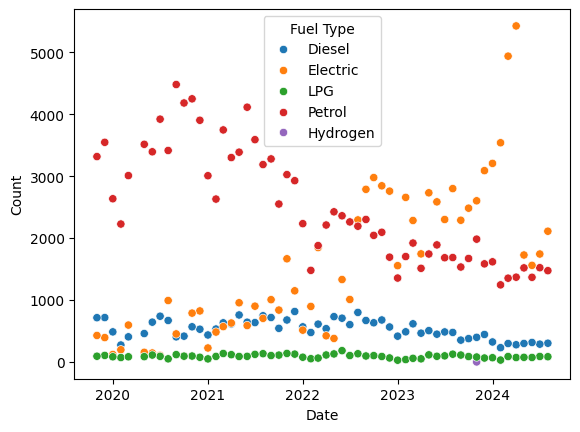

In [470]:
sns.scatterplot(data=master_df, x= master_df.index, y='Count', hue='Fuel Type')
plt.show()

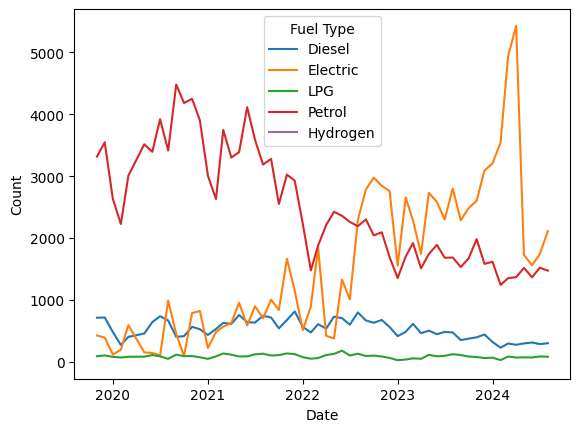

In [471]:
sns.lineplot(data=master_df, x= master_df.index, y='Count',hue = 'Fuel Type')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21008\485650876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.drop(columns = ['Date', 'Fuel Type'],inplace =True)
C:\Users\User\AppData\Local\Temp\ipykernel_21008\485650876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.sort_index(inplace = True)


                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -444.782
Date:                Thu, 17 Oct 2024   AIC                            901.564
Time:                        10:58:27   BIC                            913.716
Sample:                    11-30-2019   HQIC                           906.276
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.341      1.269      0.205      -0.236       1.101
ar.L2         -0.2364      0.217     -1.091      0.275      -0.661       0.188
ar.L3          0.1142      0.249      0.458      0.6

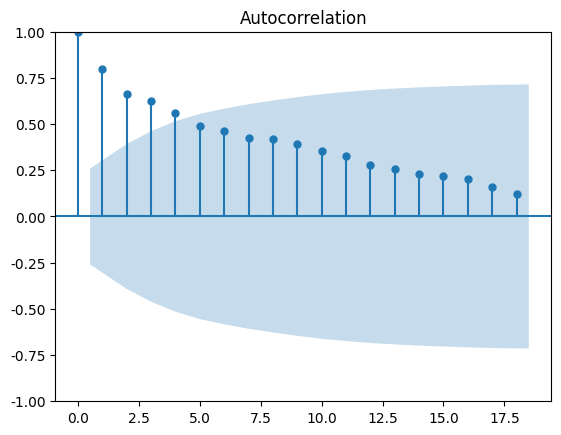

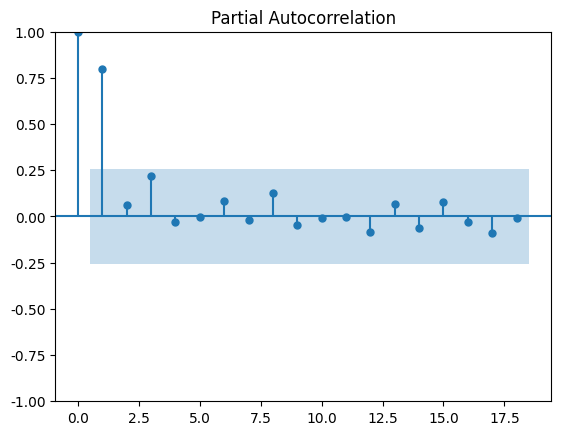

In [472]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
df_electric = master_df[master_df['Fuel Type']=='Electric']
df_electric.drop(columns = ['Date', 'Fuel Type'],inplace =True)
df_electric.index = pd.to_datetime( df_electric.index, format = '%Y-%m')
df_electric.index = df_electric.index.to_period('M')
df_electric.sort_index(inplace = True)
df_electric
plot_acf(df_electric)
plot_pacf(df_electric, method='ywm')

model = ARIMA(df_electric, order=(4,1,1))
model_fit = model.fit()
print(model_fit.summary())


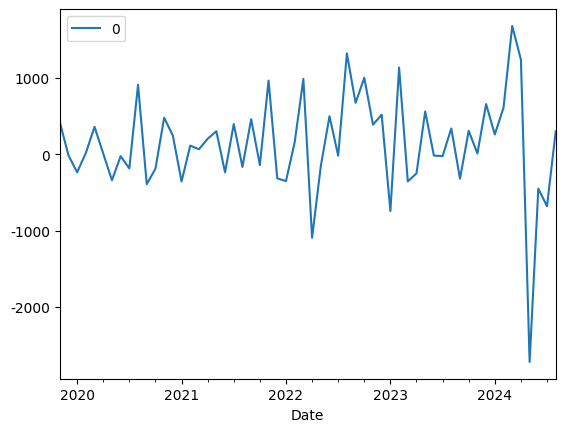

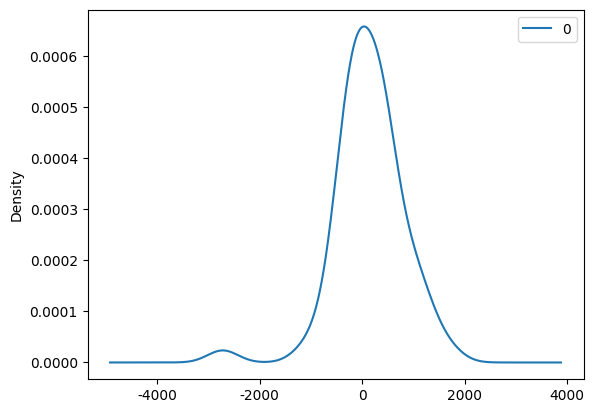

In [473]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

In [474]:
print(residuals.describe())

                 0
count    57.000000
mean    138.636593
std     665.361677
min   -2717.843050
25%    -234.754725
50%     115.137937
75%     480.000585
max    1682.678552


In [475]:
X = df_electric.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [476]:
for t in range(len(test)):
 model = ARIMA(history, order=(4,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\User\AppData\Local\Temp\ipykernel_21008\3140834947.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=2611.704388, expected=2288.000000
predicted=2276.921791, expected=2483.000000
predicted=2611.213492, expected=2602.000000
predicted=2403.320959, expected=3089.000000
predicted=2869.941207, expected=3206.000000
predicted=2992.404588, expected=3539.000000
predicted=3382.018271, expected=4937.000000
predicted=4494.378913, expected=5425.000000
predicted=5206.601033, expected=1727.000000
predicted=2713.161757, expected=1560.000000
predicted=3009.502158, expected=1743.000000
predicted=1522.970543, expected=2111.000000


Test RMSE: 1281.289


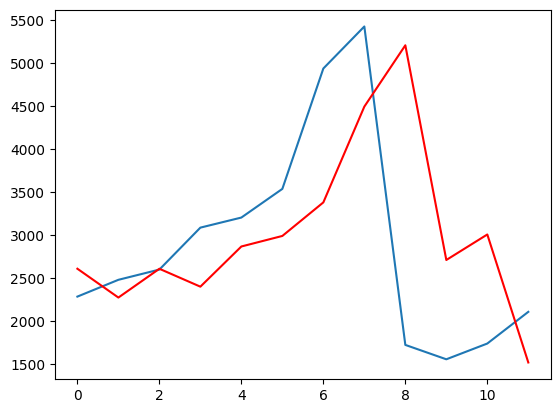

In [477]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [478]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -437.149
Date:                Thu, 17 Oct 2024   AIC                            886.297
Time:                        10:58:28   BIC                            898.341
Sample:                             0   HQIC                           890.955
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4682      0.350      1.336      0.181      -0.218       1.155
ar.L2         -0.2281      0.222     -1.026      0.305      -0.664       0.208
ar.L3          0.1806      0.291      0.621      0.5

In [479]:
ffv= master_df.groupby(master_df['Date']).count()
ffv

,Fuel Type,Count
Date,,
apr2021,4,4
apr2022,4,4
apr2023,4,4
apr2024,4,4
aug2020,4,4
aug2021,4,4
aug2022,4,4
aug2023,4,4
aug2024,4,4


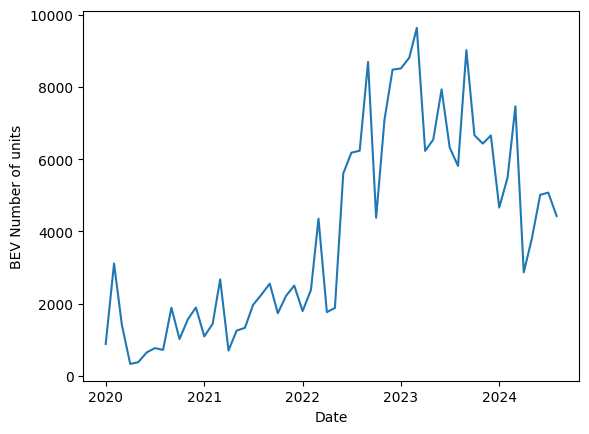

In [480]:
df_jp = pd.read_excel('EV_share_of_japan_market.xlsx')
df_jp.index = pd.to_datetime(df_jp['Date'],format = '%b%Y')
sns.lineplot(data=df_jp, x= df_jp.index, y='BEV Number of units')
plt.show()

<Axes: xlabel='Date', ylabel='BEV Number of units'>

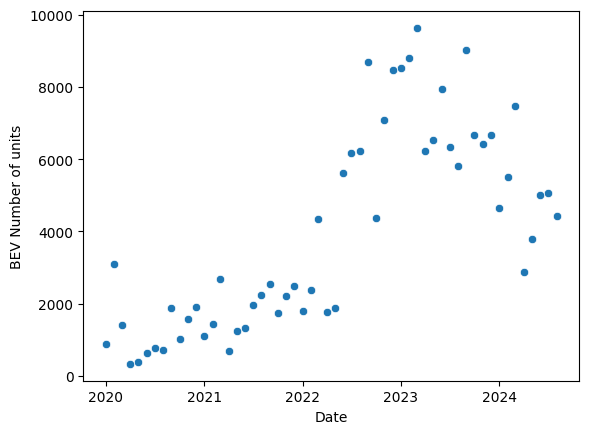

In [481]:
sns.scatterplot(data=df_jp, x= df_jp.index, y='BEV Number of units')